In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Install TensorFlow Decision Forests.

!pip install tensorflow_decision_forests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [3]:
# Check the version of TensorFlow Decision Forests.
!python3 -c "import tensorflow_decision_forests as tfdf; print('Found TF-DF v' + tfdf.__version__)"

2024-08-20 07:10:26.916362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 07:10:26.916518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 07:10:27.045198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Found TF-DF v1.8.1


In [4]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
import tensorflow_decision_forests as tfdf

print(f"Found TF-DF {tfdf.__version__}")

2024-08-20 07:10:39.824358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 07:10:39.824417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 07:10:39.825803: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found TF-DF 1.8.1


In [5]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
serving_df = pd.read_csv("/kaggle/input/titanic/test.csv")

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#Number of observations and features. 
train_df.shape, serving_df.shape

((891, 12), (418, 11))

In [7]:
#The top 5 observations of the train df  
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#The top 5 observations of the test df  
serving_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#The sample submission file in gender_submission.csv assumes that all female passengers survived (and all male passengers died). 
#We are going to check if this pattern holds true in the data (in train.csv)

women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print(f"Women survived: {round(rate_women*100,2)} %")

Women survived: 74.2 %


In [11]:
men = train_df.loc[train_df.Sex == "male"]["Survived"]
rate_men = sum(men)/len(men)

print(f"Men survived: {round(rate_men*100,2)} %")

Men survived: 18.89 %


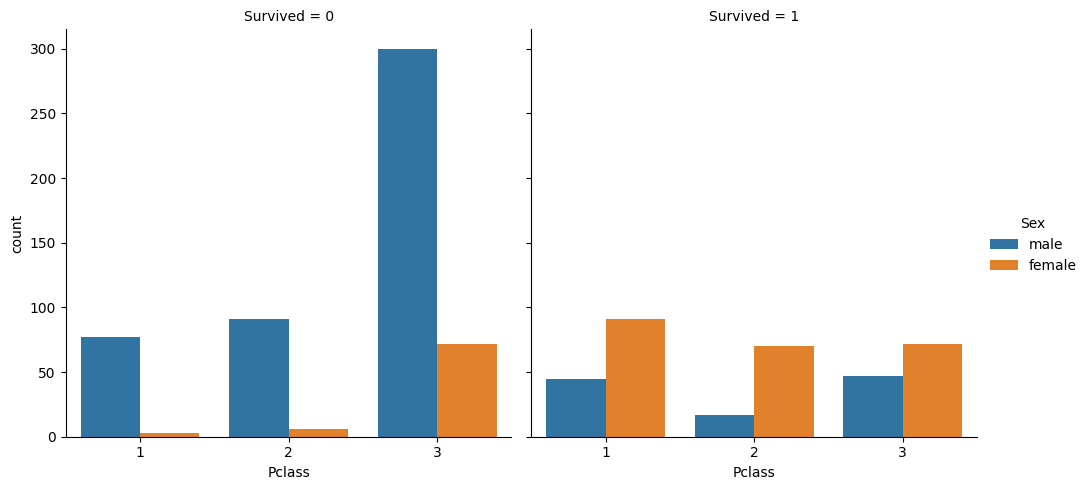

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Pclass', hue='Sex', col='Survived', data=train_df, kind='count')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
columns_to_be_encoded = ['Sex','Ticket','Cabin','Embarked']
encoders = {column: LabelEncoder() for column in columns_to_be_encoded}

for column in columns_to_be_encoded:
    train_df[column] = encoders[column].fit_transform(train_df[column])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']] = scaler.fit_transform(train_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']])

In [15]:
train_df.dropna(subset=['Age'], inplace=True)

In [16]:
train_df.fillna(0, inplace=True)

In [17]:
#Creating the variable y and X. y is the target and the X contain only the features without the target. 
y = train_df["Survived"]
#features = train_df.drop(['Survived','Cabin'], axis=1) #axis=1 because we want to delete a column.
features = ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
X = train_df[features]
#X_test = pd.get_dummies(test_df[features])

In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
len(X_train)

535

In [21]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [22]:
X_train.dropna(subset=['Age'], inplace=True)

In [23]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
634,1.0,0.0,0.107816,0.375,0.333333,0.495588,0.054457,1.000000,0.666667
75,1.0,1.0,0.308872,0.000,0.000000,0.510294,0.014932,0.952381,0.666667
874,0.5,0.0,0.346569,0.125,0.000000,0.845588,0.046845,1.000000,0.000000
843,1.0,1.0,0.428248,0.000,0.000000,0.301471,0.012565,1.000000,0.000000
474,1.0,0.0,0.271174,0.000,0.000000,0.748529,0.019202,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...
208,1.0,0.0,0.195778,0.000,0.000000,0.654412,0.015127,1.000000,0.333333
818,1.0,1.0,0.535059,0.000,0.000000,0.798529,0.012590,1.000000,0.666667
314,0.5,1.0,0.535059,0.125,0.166667,0.839706,0.051237,1.000000,0.666667
881,1.0,1.0,0.409399,0.000,0.000000,0.579412,0.015412,1.000000,0.666667


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = [
    [LogisticRegression(), 'LogisticRegression'],
    [KNeighborsClassifier(), 'KNeighborsClassifier'],
    [SVC(), 'SVC'],
    [DecisionTreeClassifier(), 'DecisionTreeClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],  # New model
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],  # New model
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier']
]

for model in models:
    print(model[0].fit(X_train, y_train))
    model.insert(2, model[0].score(X_test, y_test))
    

LogisticRegression()
KNeighborsClassifier()
SVC()
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
GaussianNB()
MLPClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
new_list = []
for i in models:
    new_list.append(i[2])

In [26]:
models

[[LogisticRegression(), 'LogisticRegression', 0.7653631284916201],
 [KNeighborsClassifier(), 'KNeighborsClassifier', 0.7430167597765364],
 [SVC(), 'SVC', 0.7486033519553073],
 [DecisionTreeClassifier(), 'DecisionTreeClassifier', 0.7094972067039106],
 [RandomForestClassifier(), 'RandomForestClassifier', 0.7877094972067039],
 [AdaBoostClassifier(), 'AdaBoostClassifier', 0.7541899441340782],
 [GradientBoostingClassifier(),
  'GradientBoostingClassifier',
  0.7821229050279329],
 [GaussianNB(), 'GaussianNB', 0.776536312849162],
 [MLPClassifier(), 'MLPClassifier', 0.776536312849162]]

In [27]:
new_list

[0.7653631284916201,
 0.7430167597765364,
 0.7486033519553073,
 0.7094972067039106,
 0.7877094972067039,
 0.7541899441340782,
 0.7821229050279329,
 0.776536312849162,
 0.776536312849162]

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grids for each classifier
gaussian_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

knn_grid = {
    'n_neighbors': range(1, 21),  # Try different neighbor counts
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Explore distance metrics
}

forest_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [4, 8, 12],  # Maximum depth of individual trees
    'criterion': ['gini', 'entropy']  # Splitting criteria for tree nodes
}

# Define the classifiers
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=42)  # Set random state for reproducibility
]

# Loop through each classifier and perform grid search
for classifier, grid in zip(classifiers, [gaussian_grid, knn_grid, forest_grid]):
    clf = GridSearchCV(estimator=classifier, param_grid=grid, cv=5)  # 5-fold cross-validation
    clf.fit(X, y)  # Replace X_train and y_train with your training data

    # Print the best parameters and score for each classifier
    print(f"Best parameters for {classifier.__class__.__name__}:")
    print(clf.best_params_)
    print(f"Best score: {clf.best_score_:.4f}")
    print("-" * 50)

Best parameters for GaussianNB:
{'var_smoothing': 1e-09}
Best score: 0.7465
--------------------------------------------------
Best parameters for KNeighborsClassifier:
{'metric': 'manhattan', 'n_neighbors': 10}
Best score: 0.7997
--------------------------------------------------
Best parameters for RandomForestClassifier:
{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 100}
Best score: 0.8180
--------------------------------------------------


In [29]:
#Creating the classifier 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=300)
model.fit(X,y)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=300)

In [30]:
from sklearn.ensemble import VotingClassifier

# Assuming you have the best parameters stored in dictionaries for each classifier (e.g., best_params_gnb, best_params_knn, best_params_rf)

# Create classifiers with the best hyperparameters
gnb = GaussianNB(var_smoothing=1e-09)
knn = KNeighborsClassifier(metric="manhattan", n_neighbors=20)
rf = RandomForestClassifier(criterion="entropy",max_depth=12,n_estimators=200)  # Include random state

# Create the voting classifier with hard or soft voting
ensemble = VotingClassifier(estimators=[('gnb', gnb), ('knn', knn), ('rf', rf)], voting='hard')  # Change 'hard' to 'soft' for weighted voting

# Train the ensemble model on your training data
ensemble.fit(X, y)

# Use the ensemble model for prediction on new data
predictions = ensemble.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.8045


In [32]:
columns_to_be_encoded = ['Sex','Ticket','Cabin','Embarked']
encoders = {column: LabelEncoder() for column in columns_to_be_encoded}

for column in columns_to_be_encoded:
    serving_df[column] = encoders[column].fit_transform(serving_df[column])
    

In [33]:
scaler = MinMaxScaler()
serving_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']] = scaler.fit_transform(serving_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']])

In [34]:
serving_df.fillna(0, inplace=True)

In [35]:
serving_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [36]:
from sklearn.ensemble import VotingClassifier

# Assuming you have the best parameters stored in dictionaries for each classifier (e.g., best_params_gnb, best_params_knn, best_params_rf)

# Create classifiers with the best hyperparameters
gnb = GaussianNB(var_smoothing=1e-09)
knn = KNeighborsClassifier(metric="manhattan", n_neighbors=20)
rf = RandomForestClassifier(criterion="entropy",max_depth=12,n_estimators=200)  # Include random state

# Create the voting classifier with hard or soft voting
model = VotingClassifier(estimators=[('gnb', gnb), ('knn', knn), ('rf', rf)], voting='hard')  # Change 'hard' to 'soft' for weighted voting

# Train the ensemble model on your training data
model.fit(X, y)


VotingClassifier(estimators=[('gnb', GaussianNB()),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=20)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     n_estimators=200))])

In [37]:
print(X_test.shape)
print(serving_df.shape)

(179, 9)
(418, 11)


In [38]:
# Predictions
predictions = model.predict(X_test)
output = pd.DataFrame({
    'PassengerId': serving_df.iloc[:len(predictions)].PassengerId, 
    'Survived': predictions
})
output.to_csv('submission.csv', index=False)